# Required Libraries

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

In [5]:
!pip install pandas statsmodels


# Data PreProcessing

In [14]:
# Reading the data into the jupyter environment

df=pd.read_csv("/Users/harshitha/Downloads/Traffic_Violations.csv")

In [116]:
df.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Accident,Belts,Personal Injury,Property Damage,...,Model,Violation Type,Charge,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type
0,2023-05-01,23:11:00,MCP,"3rd District, Silver Spring",OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY,BRIGGS CHANEY RD @ COLUMIBA PIKE,No,No,No,No,...,CRUZ,Citation,13-401(b1),False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol
1,2023-11-25,00:20:00,MCP,"6th District, Gaithersburg / Montgomery Village",FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,GEORGIA AVE / WEISMAN RD,No,No,No,No,...,COROLLA,Citation,13-409(b),False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol
2,2023-11-25,00:20:00,MCP,"6th District, Gaithersburg / Montgomery Village",DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...,GEORGIA AVE / WEISMAN RD,No,No,No,No,...,COROLLA,Citation,13-411(f),False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol
3,2023-11-26,09:16:00,MCP,"4th District, Wheaton",DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...,3803 WELLER RD,No,No,No,Yes,...,HB,Citation,21-902(a1i),False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol
4,2023-11-25,05:45:00,MCP,"4th District, Wheaton",RECKLESS DRIVING VEHICLE IN WANTON AND WILLFUL...,OLNEY LAYTONSVILLE RD @ FIELDCREST RD,No,No,No,No,...,ECLIPSE CROSS,Citation,21-901.1(a),False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol


In [16]:
# Dropping columns that we do not require for analysis

columns_to_drop = ['Geolocation', 'Latitude', 'Longitude', 'SeqID', 'Article', 'Color', 'Search Conducted', 'Search Disposition', 'Search Outcome', 'Search Reason', 'Search Reason For Stop', 'Search Type', 'Search Arrest Reason', 'Year']
df.drop(columns=columns_to_drop, inplace=True)

In [17]:
# List of columns after dropping the ones not required

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914202 entries, 0 to 1914201
Data columns (total 29 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   Date Of Stop             object
 1   Time Of Stop             object
 2   Agency                   object
 3   SubAgency                object
 4   Description              object
 5   Location                 object
 6   Accident                 object
 7   Belts                    object
 8   Personal Injury          object
 9   Property Damage          object
 10  Fatal                    object
 11  Commercial License       object
 12  HAZMAT                   object
 13  Commercial Vehicle       object
 14  Alcohol                  object
 15  Work Zone                object
 16  State                    object
 17  VehicleType              object
 18  Make                     object
 19  Model                    object
 20  Violation Type           object
 21  Charge                   object

In [18]:
# Converting Date column to "DateTime" type

df['Date Of Stop'] = pd.to_datetime(df['Date Of Stop'])

In [19]:
# Check for Missing Values

missing_values = df.isnull().sum()
missing_values

Date Of Stop                 0
Time Of Stop                 0
Agency                       0
SubAgency                    0
Description                 10
Location                     4
Accident                     0
Belts                        0
Personal Injury              0
Property Damage              0
Fatal                        0
Commercial License           0
HAZMAT                       0
Commercial Vehicle           0
Alcohol                      0
Work Zone                    0
State                       59
VehicleType                  0
Make                        72
Model                      221
Violation Type               0
Charge                       0
Contributed To Accident      0
Race                         0
Gender                       0
Driver City                481
Driver State                11
DL State                   929
Arrest Type                  0
dtype: int64

### > Defining the start and end of our date range

In [21]:
start_date = '2017-01-01'
end_date = '2022-12-31' 

# Convert start_date and end_date to datetime to ensure comparison accuracy
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter the data to include only the dates within the specified range
db = df[(df['Date Of Stop'] >= start_date) & (df['Date Of Stop'] <= end_date)]

print(db)


        Date Of Stop Time Of Stop Agency  \
1304      2018-03-14     05:58:00    MCP   
2123      2017-03-11     00:00:00    MCP   
2473      2019-11-23     22:37:00    MCP   
5807      2022-12-21     14:03:00    MCP   
5824      2018-08-21     19:05:00    MCP   
...              ...          ...    ...   
1914196   2018-09-21     07:21:00    MCP   
1914198   2018-11-14     23:21:00    MCP   
1914199   2019-05-21     22:06:00    MCP   
1914200   2017-07-02     13:19:00    MCP   
1914201   2019-01-07     08:33:00    MCP   

                                               SubAgency  \
1304                              2nd District, Bethesda   
2123     6th District, Gaithersburg / Montgomery Village   
2473                               4th District, Wheaton   
5807                 Headquarters and Special Operations   
5824                              2nd District, Bethesda   
...                                                  ...   
1914196                           2nd District, Bet

In [24]:
missing = db.isnull().sum()
missing


Date Of Stop                 0
Time Of Stop                 0
Agency                       0
SubAgency                    0
Description                  1
Location                     0
Accident                     0
Belts                        0
Personal Injury              0
Property Damage              0
Fatal                        0
Commercial License           0
HAZMAT                       0
Commercial Vehicle           0
Alcohol                      0
Work Zone                    0
State                        0
VehicleType                  0
Make                        20
Model                       43
Violation Type               0
Charge                       0
Contributed To Accident      0
Race                         0
Gender                       0
Driver City                272
Driver State                 0
DL State                     0
Arrest Type                  0
dtype: int64

In [25]:
# Dropping the fields with missing values

db = db.dropna()

In [26]:
# Final check for missing values

miss = db.isnull().sum()
miss

Date Of Stop               0
Time Of Stop               0
Agency                     0
SubAgency                  0
Description                0
Location                   0
Accident                   0
Belts                      0
Personal Injury            0
Property Damage            0
Fatal                      0
Commercial License         0
HAZMAT                     0
Commercial Vehicle         0
Alcohol                    0
Work Zone                  0
State                      0
VehicleType                0
Make                       0
Model                      0
Violation Type             0
Charge                     0
Contributed To Accident    0
Race                       0
Gender                     0
Driver City                0
Driver State               0
DL State                   0
Arrest Type                0
dtype: int64

### > Categorzing the "Description" column and creating a new column called "Violation Category"

In [22]:
# Checking all the distinct values in the "Distribution" column

print(df['Description'].unique())

['OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY'
 'FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER'
 'DISPLAYING EXPIRED REGISTRATION PLATE ISSUED BY ANY STATE' ...
 'VEH.W/O REQUIRED STOP LAMPS EQUIPMENT'
 "FAILURE OF MV OPER. DRIVING ON HWY TO  CARRY  EVID. OF REQ'D SECURITY FOR MV"
 'OPERATE MOTOR VEH ON HWY WITHOUT REQUIRED STOP LAMP']


In [27]:
def categorize_violation(description):
    description = description.lower()  
    if 'license' in description or 'revoked' in description or 'lic' in description or 'permit' in description or 'card' in description:
        return 'License'
    elif 'uninsured' in description or 'insurance' in description:
        return 'Insurance'
    elif 'speed' in description or 'limit' in description:
        return 'Speed Limit'
    elif 'child' in description or 'children' in description or '16' in description:
        return 'Under Age'
    elif 'parking' in description:
        return 'No Parking'
    elif 'right' in description or 'left' in description or 'turn' in description or 'improper' in description or 'backing' in description:
        return 'Right-of-Way/Turn/Backing '
    elif 'right' in description and 'way' in description:
        return 'Right-of-Way/Turn/Backing'
    elif 'tabs' in description or 'plates' in description or 'plate' in description or 'tab' in description:
        return 'Registration Plate'
    elif 'registration' in description or 'suspended' in description:
        return 'Suspended Registration'
    elif 'careless' in description or 'control' in description or 'reckless' in description or 'unsafe' in description or 'aggressive' in description or 'negligent' in description:
        return 'Negligent Driving'
    elif 'alcohol' in description or 'influence' in description:
        return 'Under the Influence'
    elif 'telephone' in description or 'text' in description:
        return 'Distracted Driving'
    elif 'red' in description or 'stop' in description or 'curb' in description:
        return 'Red Signal'
    elif 'crosswalk' in description:
        return 'Stopped on Crosswalk'
    elif 'off' in description:
        return 'Off Road Driving'
    elif 'window' in description or 'tint' in description or 'glass' in description:
        return 'Window Tint'
    elif 'seat' in description or 'belt' in description:
        return 'Seat Belt'
    elif 'lighted' in description or 'lamps' in description or 'Tail' in description or 'headlights' in description or 'lamp' in description:
        return 'Lights/Reflectors'
    elif 'exhaust' in description or 'brake' in description or 'suspension' in description or 'shocks' in description:
        return 'Exhaust/Brake'
    elif 'taillights' in description or 'tag' in description or 'lights' in description or 'reflectors' in description or 'light' in description or 'headlight' in description:
        return 'Lights/Reflectors'
    elif 'lane' in description or 'lanes' in description or 'one' in description:
        return 'Wrong Lane/Way'
    elif 'incompliance' in description or 'incompliant' in description:
        return 'Incompliance'
    else:
        return 'Other'

# Apply the function to categorize each offense
db['Violation Category'] = db['Description'].apply(categorize_violation)

# Display the first few rows to verify our categorization
db[['Description', 'Violation Category']].head()

,Description,Violation Category
1304,HEADLIGHTS (*),Lights/Reflectors
2123,TAG LIGHTS (*),Lights/Reflectors
2473,HEADLIGHTS (*),Lights/Reflectors
5807,"PEDESTRIAN FAIL TO OBEY ""UPRAISED HAND"" SIGNAL",Other
5824,DRIVING VEH. ON HWY. WITH UNPAID REGISTRATION FEE,Suspended Registration


### > Extracting Stop year, Stop month, day of week, stop day etc from "Date of Stop" column

In [75]:
db['Stop Year'] = db['Date Of Stop'].dt.year
db['Stop Month'] = db['Date Of Stop'].dt.month
db['Month Name'] = db['Date Of Stop'].dt.month_name()
db['Stop Day'] = db['Date Of Stop'].dt.day
db['Day Of Week'] = db['Date Of Stop'].dt.day_name()

db['hour'] = pd.to_datetime(db['Time Of Stop'], format='%H:%M:%S').dt.hour + 1

# Extracting weekday number (Monday=0, Sunday=6)
db['Weekday'] = db['Date Of Stop'].dt.dayofweek + 1

# Extracting short weekday name
db['weekday_full'] = db['Date Of Stop'].dt.strftime('%a')

### > Cleaning "Time of Stop" column

In [64]:
# Converting Time of Stop to proper format

db['Time Of Stop'] = pd.to_datetime(db['Time Of Stop'], format='%H:%M:%S', errors='coerce').dt.time
print(db[['Time Of Stop']].head())


     Time Of Stop
1304     05:58:00
2123     00:00:00
2473     22:37:00
5807     14:03:00
5824     19:05:00


In [90]:
# Making sure the necessary new columns have been added

db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 806432 entries, 1304 to 1914201
Data columns (total 39 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Date Of Stop             806432 non-null  datetime64[ns]
 1   Time Of Stop             806432 non-null  object        
 2   Agency                   806432 non-null  object        
 3   SubAgency                806432 non-null  object        
 4   Description              806432 non-null  object        
 5   Location                 806432 non-null  object        
 6   Accident                 806432 non-null  object        
 7   Belts                    806432 non-null  object        
 8   Personal Injury          806432 non-null  object        
 9   Property Damage          806432 non-null  object        
 10  Fatal                    806432 non-null  object        
 11  Commercial License       806432 non-null  object        
 12  HAZMAT           

# Data Visualization

## 1. Distribution of Enforcement Action

<Figure size 1000x600 with 0 Axes>

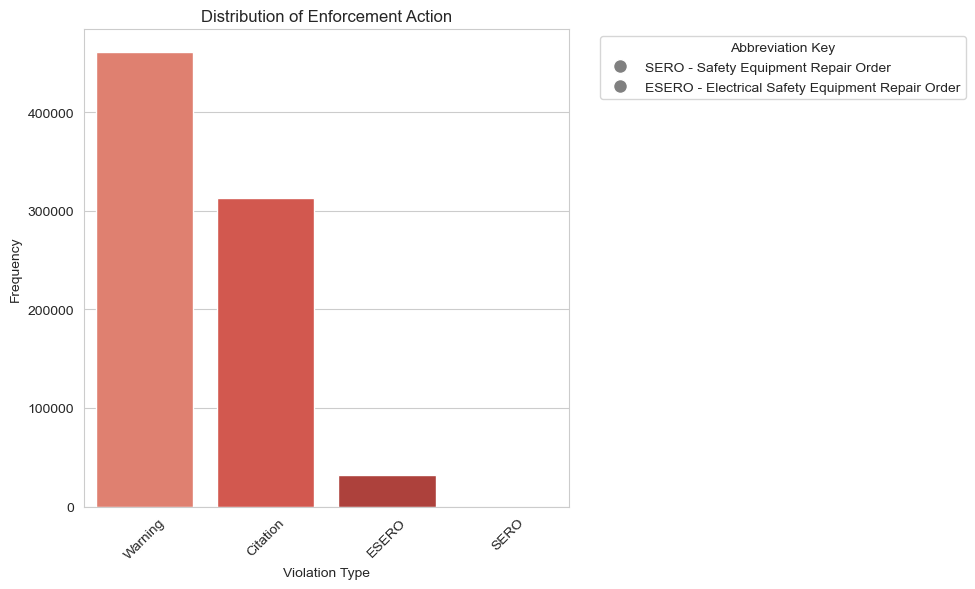

In [82]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=db, x='Violation Type', palette='Reds_d', order=db['Violation Type'].value_counts().index)

plt.title('Distribution of Enforcement Action')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

abbreviation_explanations = {
    'SERO': 'Safety Equipment Repair Order',
    'ESERO': 'Electrical Safety Equipment Repair Order',
}

# Creating Custom Legends
legend_labels = [f"{abbr} - {exp}" for abbr, exp in abbreviation_explanations.items()]
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                             markerfacecolor='gray', markersize=10) for label in legend_labels]
plt.legend(handles=legend_patches, title='Abbreviation Key', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### > Checking the types of traffic violation under "Warning" enforcement action

In [83]:
warnings_df = db[db['Violation Type'] == 'SERO']
warnings_value = warnings_df['Violation Category'].unique()
print(warnings_value)

['Red Signal' 'Exhaust/Brake']


## 2. Enforcement Action by Violation Category

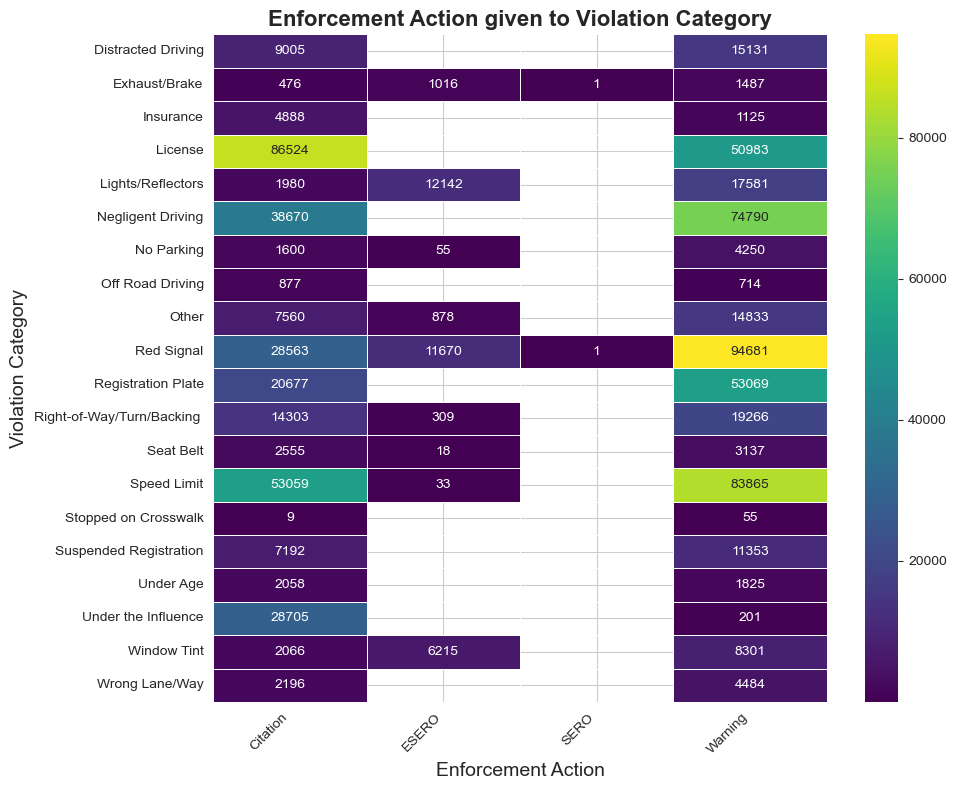

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is still loaded and accessible
# If the data is large, consider using a subset or aggregating it for clearer visualization

# Counting the occurrences of each combination of "Violation Category" and "Violation Type"
violation_counts = db.groupby(['Violation Category', 'Violation Type']).size().reset_index(name='Count')

# Creating a pivot table for the heatmap
pivot_table = violation_counts.pivot(index="Violation Category", columns="Violation Type", values="Count")


# Using a heatmap to visualize the counts of Violation Type within each Violation Category
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="viridis", linewidths=.5)

plt.title('Enforcement Action given to Violation Category', fontsize=16, fontweight='bold')
plt.xlabel('Enforcement Action', fontsize=14)
plt.ylabel('Violation Category', fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## 3. Resaons for Traffic Stops

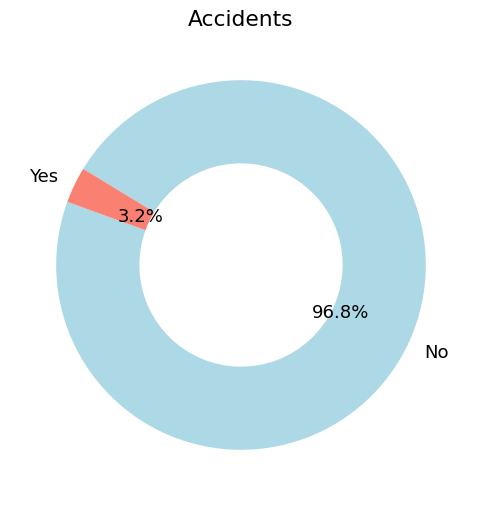

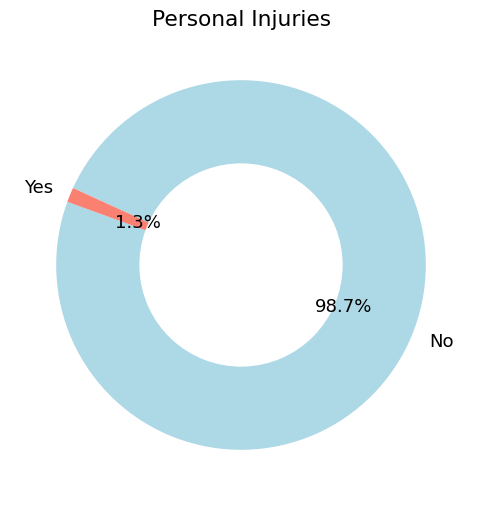

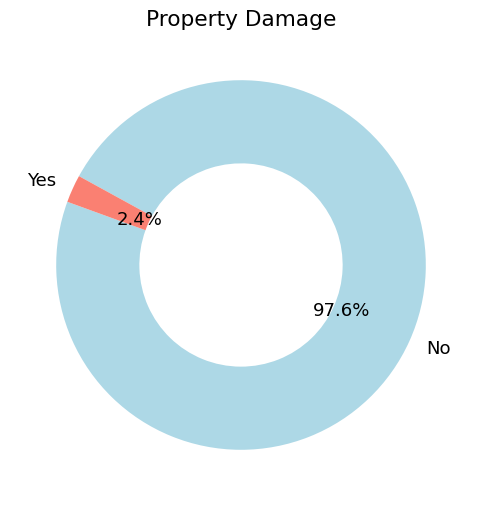

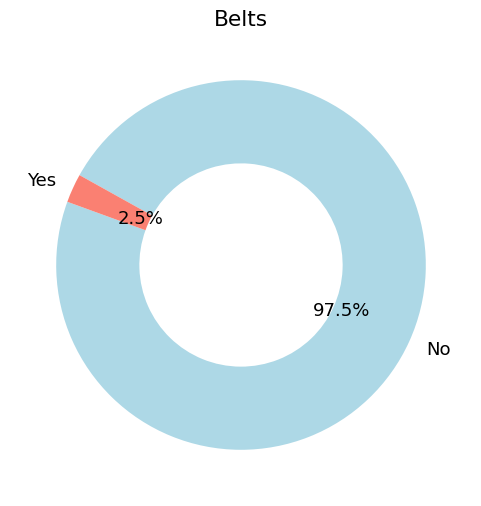

In [85]:
def create_donut_chart_with_colors(column, title, colors):
    plt.rcParams['font.size'] = 13
    counts = db[column].value_counts()
    # Create the donut chart with specified colors
    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=160, colors=colors, wedgeprops=dict(width=0.45))
    plt.title(title)
    plt.show()
    
    plt.rcParams.update(plt.rcParamsDefault)

# Defining color palettes for each chart
colors_accident = ['lightblue', 'salmon']
colors_personal_injury = ['lightblue', 'salmon']
colors_property_damage = ['lightblue', 'salmon']
colors_belts = ['lightblue', 'salmon']

# Plotting donut charts 
create_donut_chart_with_colors('Accident', 'Accidents', colors_accident)
create_donut_chart_with_colors('Personal Injury', 'Personal Injuries', colors_personal_injury)
create_donut_chart_with_colors('Property Damage', 'Property Damage', colors_property_damage)
create_donut_chart_with_colors('Belts', 'Belts', colors_belts)


## 4. Top Violation Categories

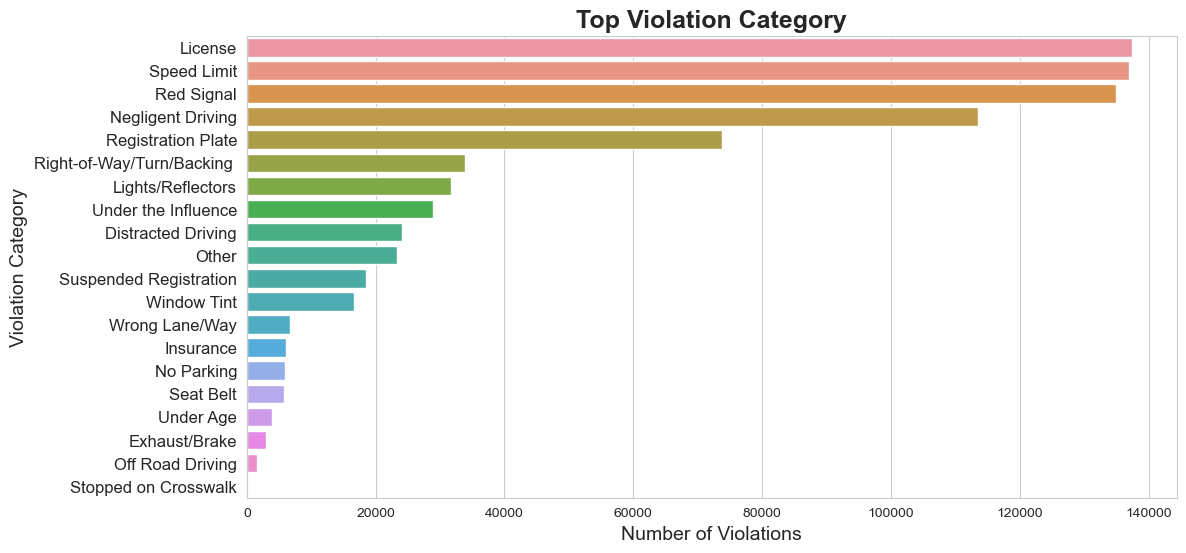

In [114]:
violation_distribution = db['Violation Category'].value_counts()
top_violations = violation_distribution.head(20)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_violations.values, y=top_violations.index)
plt.title('Top Violation Category', fontsize=18, fontweight='bold')
plt.xlabel('Number of Violations', fontsize=14)
plt.ylabel('Violation Category', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
plt.show()

## 5. Top Violations by Gender

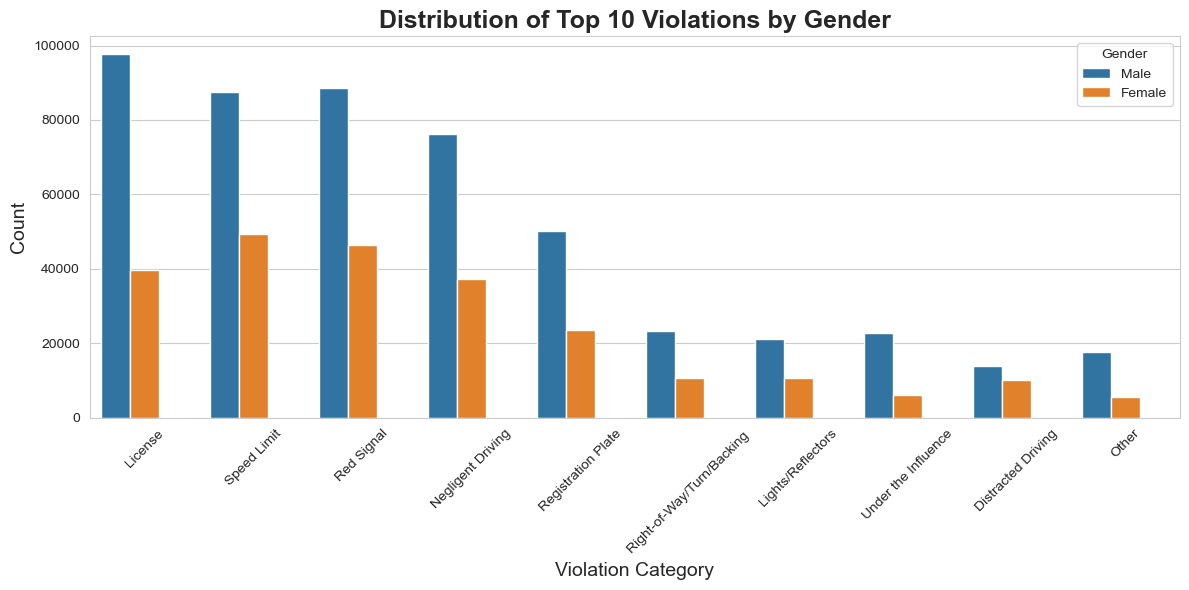

In [110]:
sns.set_style("whitegrid")
top_10_categories = db['Violation Category'].value_counts().nlargest(10).index

# Filtering the DataFrame to include only the top 10 violation categories
db_top_10 = db[db['Violation Category'].isin(top_10_categories)]

# Plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=db_top_10, x='Violation Category', hue='Gender', 
                   palette='tab10',  
                   order=top_10_categories)

plt.title('Distribution of Top 10 Violations by Gender', fontsize=18, fontweight='bold')
plt.xlabel('Violation Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
handles, labels = ax.get_legend_handles_labels()
new_labels = ['Female' if label == 'F' else 'Male' for label in labels if label != 'U']
plt.legend(handles=handles[:len(new_labels)], labels=new_labels, title='Gender')
plt.tight_layout()
plt.show()

## 6. Top Loactions for Traffic Violations

In [70]:
location_counts = db['Location'].value_counts().nlargest(10).reset_index()
location_counts.columns = ['Location', 'Number of Violations']

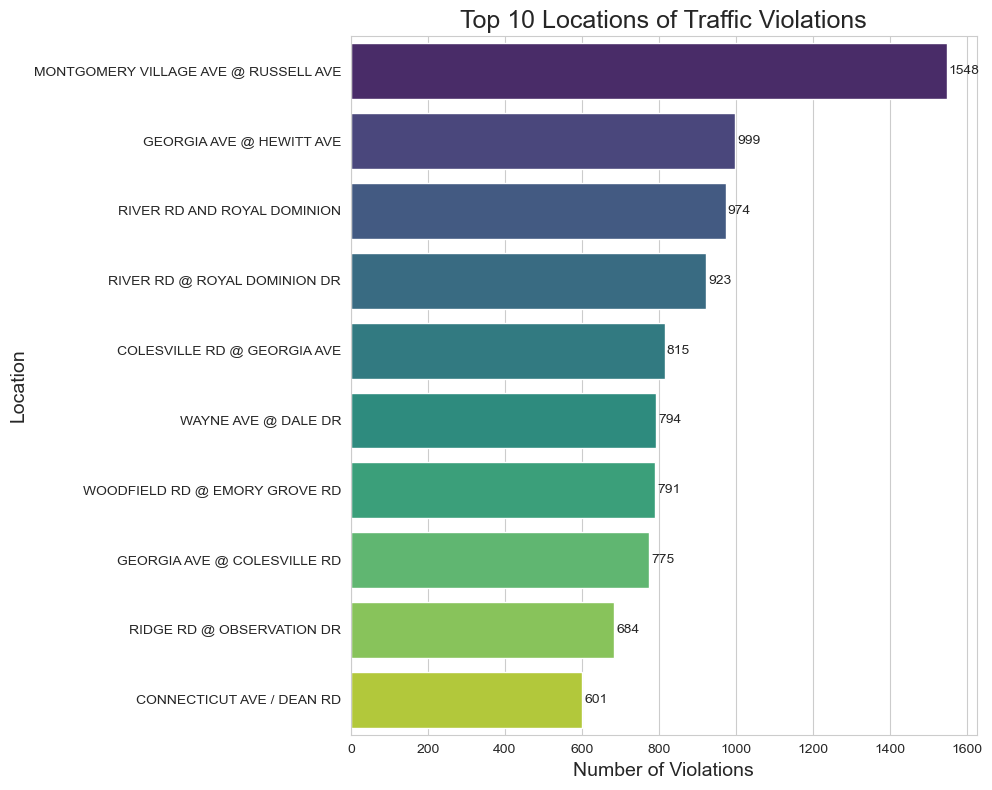

In [115]:
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='Number of Violations', y='Location', data=location_counts, palette='viridis')
for p in barplot.patches:
    width = p.get_width()  
    plt.text(width + 5,  
             p.get_y() + p.get_height() / 2,  
             '{:1.0f}'.format(width),  
             ha='left', va='center') 

plt.title('Top 10 Locations of Traffic Violations', fontsize=18)
plt.xlabel('Number of Violations', fontsize=14)
plt.ylabel('Location', fontsize=14)
plt.tight_layout()
plt.show()

## 7. Time Series Analysis

In [40]:
# Grouping by 'Stop Month' and 'Stop Year', and then counting occurrences
tab_ptn = db.groupby(['Stop Month', 'Stop Year']).size().reset_index(name='count')

# Sorting values by 'Stop Year' and 'Stop Month' for chronological ordering
tab_ptn_sorted = tab_ptn.sort_values(by=['Stop Year', 'Stop Month'])

# Starting the time series in January 
start_year = tab_ptn_sorted['Stop Year'].min()

# Creating a pandas Series (time series) with the count data, indexed by a period range
date_range = pd.period_range(start=f'{start_year}-01', periods=len(tab_ptn_sorted), freq='M')
time_ser = pd.Series(tab_ptn_sorted['count'].values, index=date_range)

print(time_ser)

2017-01    16803
2017-02    19239
2017-03    18749
2017-04    15276
2017-05    16213
           ...  
2022-08     2511
2022-09     5268
2022-10     5048
2022-11     5823
2022-12     6776
Freq: M, Length: 72, dtype: int64


## 7.1 Time Series Plot with Trend Line

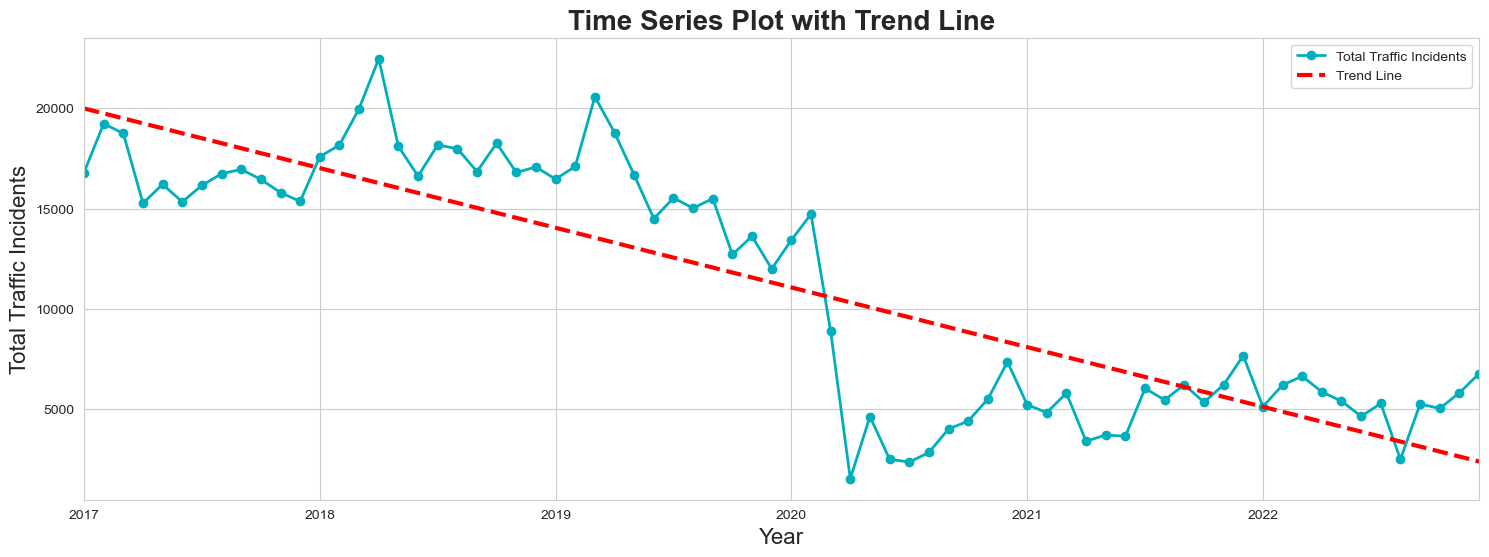

In [99]:
plt.figure(figsize=(18, 6))

time_ser.plot(style='-o', linewidth=2, color='#00AFBB', label='Total Traffic Incidents')

# Adding linear regression trend line
X = np.arange(len(time_ser)).reshape(-1, 1)  
X = sm.add_constant(X)  
model = OLS(time_ser.values, X).fit()
plt.plot(time_ser.index, model.predict(X), 'r--', linewidth=3, label='Trend Line')

plt.title('Time Series Plot with Trend Line', fontsize=20, fontweight='bold')
plt.ylabel('Total Traffic Incidents', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.legend()
plt.show()


## 7.2 Aggregate Plot for Yearly Average

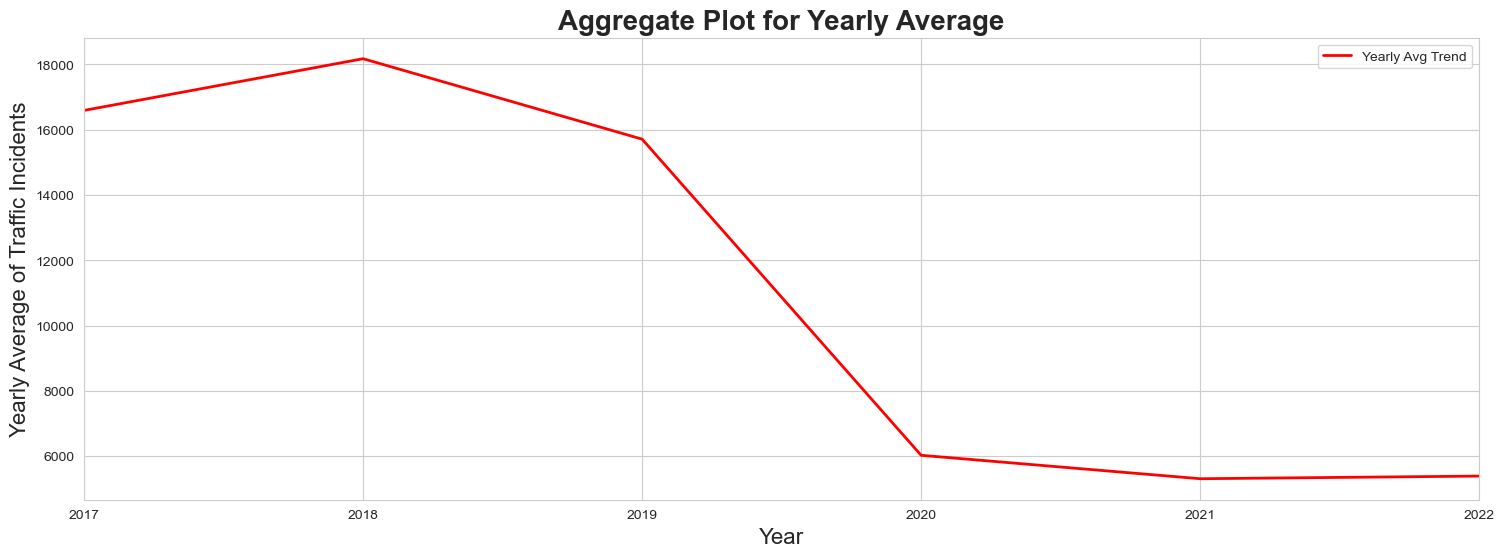

In [101]:
plt.figure(figsize=(18, 6))
yearly_avg = time_ser.resample('Y').mean()

# Plot
yearly_avg.plot(style='r-', linewidth=2, label='Yearly Avg Trend')
plt.title('Aggregate Plot for Yearly Average', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Yearly Average of Traffic Incidents', fontsize=16)
plt.legend()
plt.show()

## 7.3 Box Plot for Seasonality

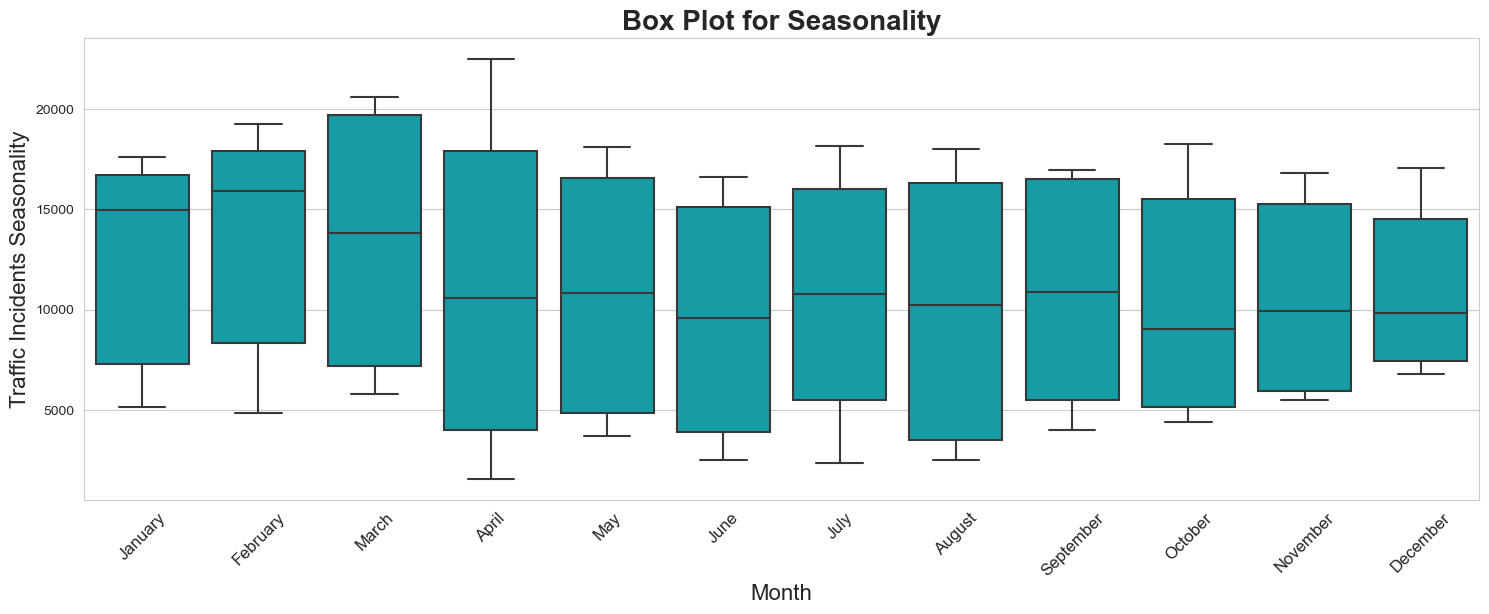

In [104]:
plt.figure(figsize=(18, 6))

# Prepare data for seasonality box plot
time_ser_monthly = time_ser.copy()
time_ser_monthly.index = time_ser.index.month

# Create boxplot
sns.boxplot(x=time_ser_monthly.index, y=time_ser_monthly.values, color='#00AFBB')

# Adjust x-ticks to show month names
plt.title('Box Plot for Seasonality', fontsize=20, fontweight='bold')
plt.xlabel('Month', fontsize=16)
plt.ylabel('Traffic Incidents Seasonality', fontsize=16)
plt.xticks(ticks=np.arange(12), labels=pd.date_range(start='2021-01-01', periods=12, freq='M').strftime('%B'), rotation=45, fontsize=12)

plt.show()


## 7.4 Traffic Violations by Hour of the Day

In [66]:
# Extracting hour from 'Time Of Stop' if it's not Null

db['Hour Of Stop'] = db['Time Of Stop'].apply(lambda x: x.hour if x is not None else None)
print(db[['Time Of Stop', 'Hour Of Stop']].head())


     Time Of Stop  Hour Of Stop
1304     05:58:00             5
2123     00:00:00             0
2473     22:37:00            22
5807     14:03:00            14
5824     19:05:00            19


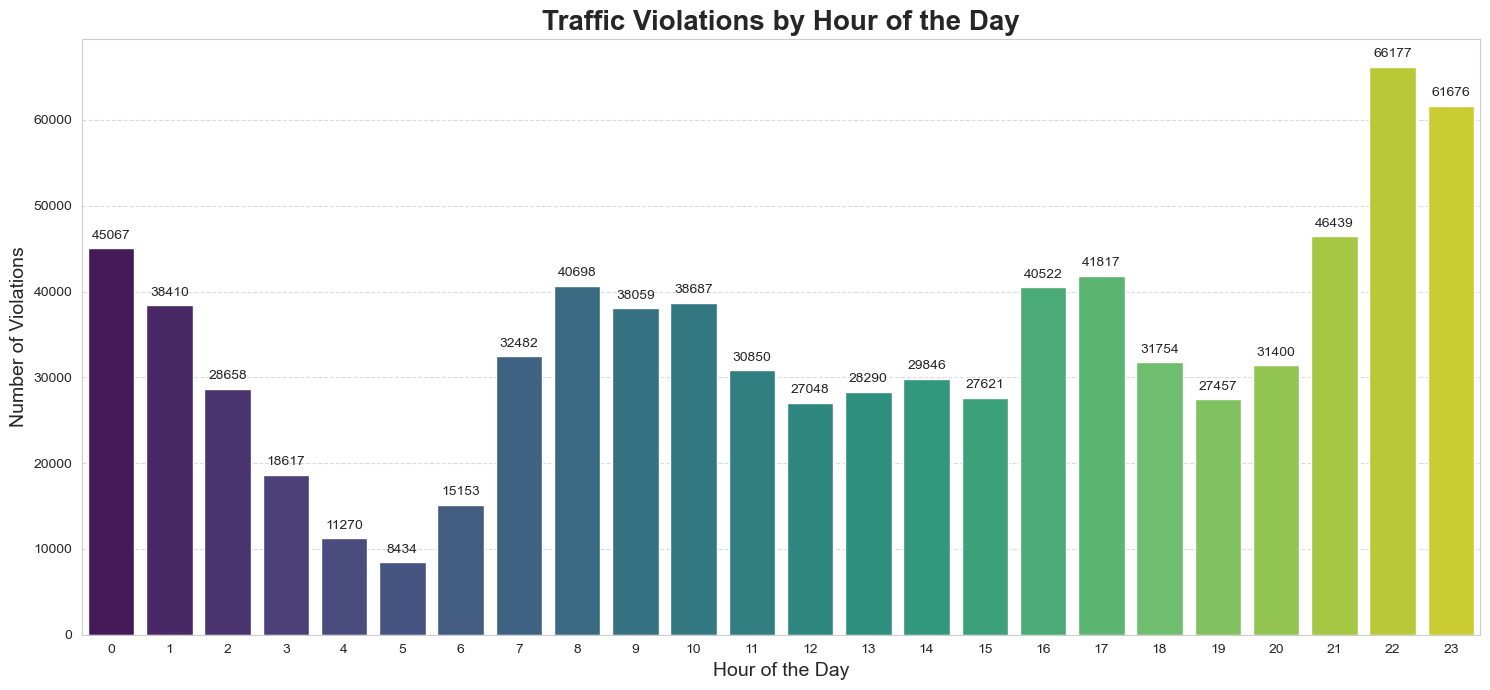

In [105]:
# Group by the 'Hour Of Stop' and count the violations
hourly_counts = db.groupby('Hour Of Stop').size().reset_index(name='Number of Violations')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")
palette = sns.color_palette("viridis", n_colors=len(hourly_counts))

# Time Series Bar Plot for Hourly Traffic Violations using Seaborn with enhancements
plt.figure(figsize=(15, 7))
barplot = sns.barplot(data=hourly_counts, x='Hour Of Stop', y='Number of Violations', palette=palette)

plt.title('Traffic Violations by Hour of the Day', fontsize=20, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Violations', fontsize=14)
plt.xticks(rotation=0)

# Adding value labels on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 7.5 Traffic Violations by Day of the Week

In [76]:
# Counting the number of violations for each day of the week
daily_counts = db['Day Of Week'].value_counts().reset_index()
daily_counts.columns = ['Day Of Week', 'Number of Violations']

# Sorting the days of the week in the order they occur
sort_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_counts['Day Of Week'] = pd.Categorical(daily_counts['Day Of Week'], categories=sort_order, ordered=True)
daily_counts = daily_counts.sort_values('Day Of Week')

daily_counts

,Day Of Week,Number of Violations
4,Monday,106747
0,Tuesday,144755
1,Wednesday,133893
2,Thursday,127341
3,Friday,122448
5,Saturday,89827
6,Sunday,81421


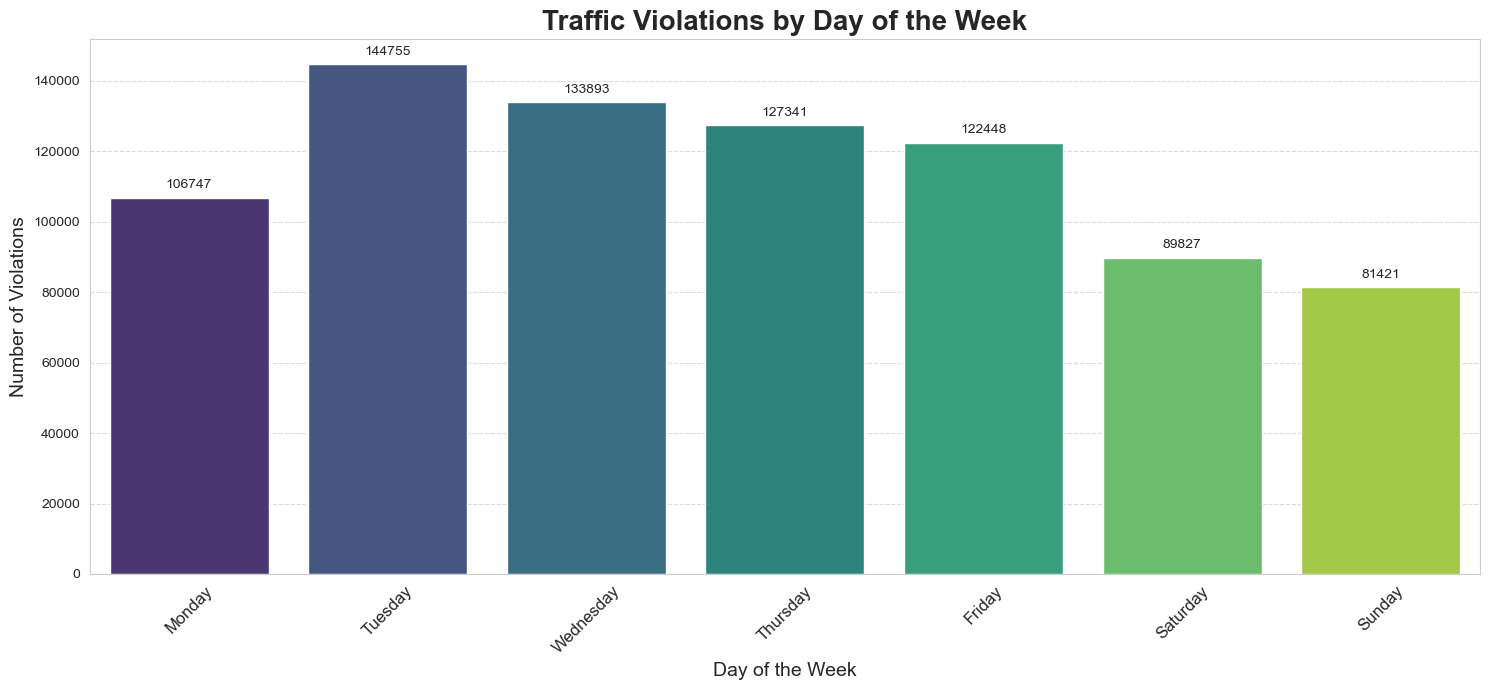

In [108]:
sns.set_style("whitegrid")
palette = sns.color_palette("viridis", n_colors=len(daily_counts))
plt.figure(figsize=(15, 7))
barplot = sns.barplot(data=daily_counts, x='Day Of Week', y='Number of Violations', palette=palette)
plt.title('Traffic Violations by Day of the Week', fontsize=20, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Violations', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  

# Adding value labels on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()